# Desgin with explicit Formula

This tutorial notebook shows how to setup a D-optimal design with BoFire while providing an explicit formula and not just one of the four available keywords `linear`, `linear-and-interaction`, `linear-and-quadratic`, `fully-quadratic`.

Make sure that `cyipopt`is installed. The recommend way is the installation via conda `conda install -c conda-forge cyipopt`.

## Imports

In [1]:
from bofire.data_models.api import Domain, Inputs
from bofire.data_models.features.api import ContinuousInput
from bofire.strategies.doe.design import find_local_max_ipopt
from formulaic import Formula
from sklearn.preprocessing import MinMaxScaler
import itertools
import pandas as pd

/opt/homebrew/Caskroom/miniforge/base/envs/bofire/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Setup of the problem

In [2]:
input_features=Inputs(
        features=[
            ContinuousInput(key="a", lower_bound=1, upper_bound=5),
            ContinuousInput(key="b", lower_bound=40, upper_bound=800),
            ContinuousInput(key="c", lower_bound=80, upper_bound=180),
            ContinuousInput(key="d", lower_bound=200, upper_bound=800)
        ]  
    )
domain = Domain(input_features=input_features)

## Defintion of the formula for which the optimal points should be found

In [3]:
model_type = Formula("a + {a**2} + b + c + d + a:b + a:c + a:d + b:c + b:d + c:d")
model_type


1 + a + a**2 + b + c + d + a:b + a:c + a:d + b:c + b:d + c:d

## Find D-optimal Design

In [51]:
design = find_local_max_ipopt(domain=domain, model_type=model_type, n_experiments=16)
design

,a,b,c,d
exp0,5.000000,800.000008,180.000002,800.000008
exp1,1.000000,40.000000,79.999999,199.999998
exp2,2.263429,800.000008,79.999999,800.000008
exp3,1.000000,40.000000,79.999999,800.000008
exp4,3.000000,800.000008,180.000002,199.999998
exp5,3.000000,40.000000,180.000002,800.000008
exp6,1.000000,800.000008,180.000002,800.000008
exp7,3.736571,40.000000,79.999999,199.999998
exp8,1.000000,800.000008,79.999999,199.999998
exp9,5.000000,40.000000,79.999999,800.000008


## Analyze Confounding

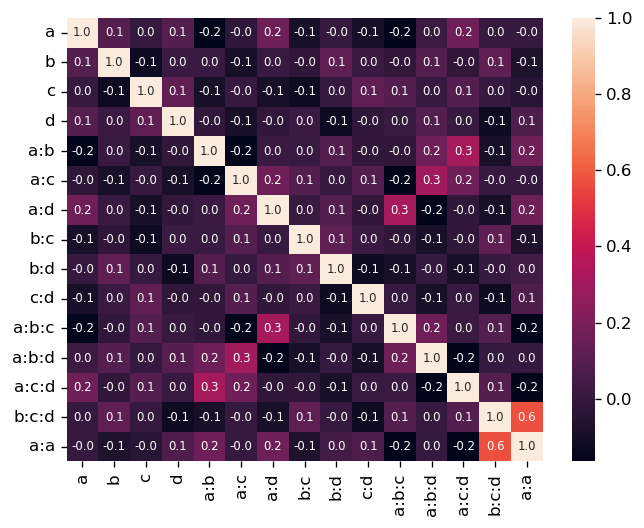

In [52]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_design = pd.DataFrame(data=scaler.fit_transform(design[["a","b","c","d"]]), columns=["a","b","c","d"])


# add two level interactions
for combi in list(itertools.combinations(["a","b","c","d"],2)):
    feat1, feat2 = combi[0], combi[1]
    scaled_design[f"{feat1}:{feat2}"] = scaled_design[feat1]*scaled_design[feat2]
# add three level interactions
for combi in list(itertools.combinations(["a","b","c","d"],3)):
    feat1, feat2, feat3 = combi[0], combi[1], combi[2]
    scaled_design[f"{feat1}:{feat2}:{feat3}"] = scaled_design[feat1]*scaled_design[feat2]*scaled_design[feat3]
# add quadratic term
scaled_design["a:a"] = scaled_design["a"]*scaled_design["a"]


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.dpi"] = 120
sns.heatmap(scaled_design.corr(), annot=True, annot_kws={"fontsize":7},fmt="2.1f")
plt.show()
